In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cart
import cartopy.io.img_tiles as cimgt
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import scipy.stats as stats
import calendar

In [4]:
file_path = r"C:\Users\bendo\OneDrive - George Mason University - O365 Production\Class\Clim680\data\nino34_1982-2019.oisstv2_anoms.nc"
ds_nino34 = xr.open_dataset(file_path)
ds_nino34

<xarray.Dataset> Size: 9kB
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 4kB ...
Data variables:
    sst      (time) float32 2kB ...

El Nino:  61
Neutral:  330
La Nina:  65
[array(61), array(65), array(330)]


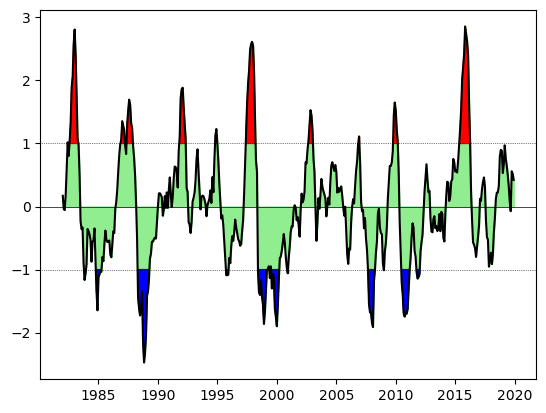

In [5]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
                                              ds_nino34['sst']<1))

print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

plt.plot(ds_nino34['time'],ds_nino34['sst'],'k')
plt.fill_between(ds_nino34['time'].values,ds_nino34['sst'],color='lightgreen')
plt.fill_between(ds_nino34['time'].values,elnino,y2=1.0,color='red')
plt.fill_between(ds_nino34['time'].values,lanina,y2=-1.0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted');

In [7]:
thepath = r"C:\Users\bendo\OneDrive - George Mason University - O365 Production\Class\Clim680\data\icec.mon.mean.nc"
ds_icec = xr.open_dataset(thepath)
ds_icec = ds_icec.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))
ds_icec

<xarray.Dataset> Size: 118MB
Dimensions:  (lat: 180, lon: 360, time: 456)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
Data variables:
    icec     (time, lat, lon) float32 118MB ...
Attributes:
    title:            created 05/2014 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       https://www.psl.noaa.gov/data/gridded/cobe2.html

In [8]:
icec_clim = ds_icec['icec'].groupby('time.month').mean(dim='time')
icec_anom = ds_icec['icec'].groupby('time.month') - icec_clim
icec_anom

<xarray.DataArray 'icec' (time: 456, lat: 180, lon: 360)> Size: 118MB
array([[[ 0.00973684,  0.01026314,  0.00921047, ...,  0.00973684,
          0.01000005,  0.00947362],
        [ 0.01184201,  0.01157892,  0.0113157 , ...,  0.01184195,
          0.01184201,  0.01184201],
        [ 0.01342112,  0.0126316 ,  0.01236844, ...,  0.01236844,
          0.01289481,  0.01552629],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.00684208,  0.00631571,  0.00710517, ...,  0.00657892,
          0.00684196,  0.00631565],
        [ 0.00921059,  0.00921047,  0.00973684, ...,  0.00868428,
          0.00894737,  0.00868428],
        [ 0.01289487,  0.01315808,  0.01342124, ...,  0.01184225,
          0.01236844,  0.01526332],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.00289476, -0.00263155, -0.00289476, ..., -0.00394732,
         -0.00315791, -0.00342113],
        [ 0.01815784,  0.00868428,  0.00815791, ...,  0.00815785,
          0.00789469,  0.00815785],
        [ 0.00921059,  0.00894737,  0.00894737, ...,  0.00868428,
          0.00789469,  0.01263154],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 4kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

Text(0.5, 1.0, 'Sea Ice Concentration Anomaly')

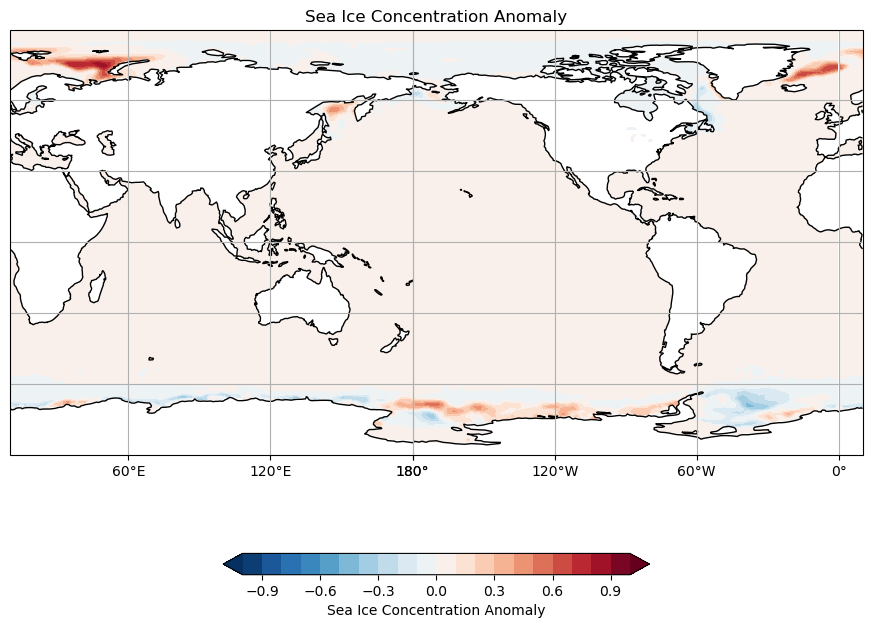

In [ ]:
clevs = np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-170))

#Add cyclic point

cyclic_data, cyclic_lons = add_cyclic_point(icec_anom.values,coord=ds_icec['lon'])

#Make a filled contour plot
cs = ax.contourf(ds_icec['lon'],ds_icec['lat'],icec_anom[0,:,:],clevs,
                 transform=ccrs.PlateCarree(),
                 cmap='RdBu_r',extend='both')

#Add coastlines
ax.coastlines()

#Add gridlines
ax.gridlines()

#Define the xticks for longtitude
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# ax.set_extent([-180,180,20,90],ccrs.PlateCarree())
# Call the colorbar
cbar = plt.colorbar(cs,orientation='horizontal', shrink=0.5, 
                    label='Sea Ice Concentration Anomaly')

#Add a title
ax.set_title('Sea Ice Concentration Anomaly')


Text(0.5, 1.0, 'Sea Ice Concentration Anomaly')

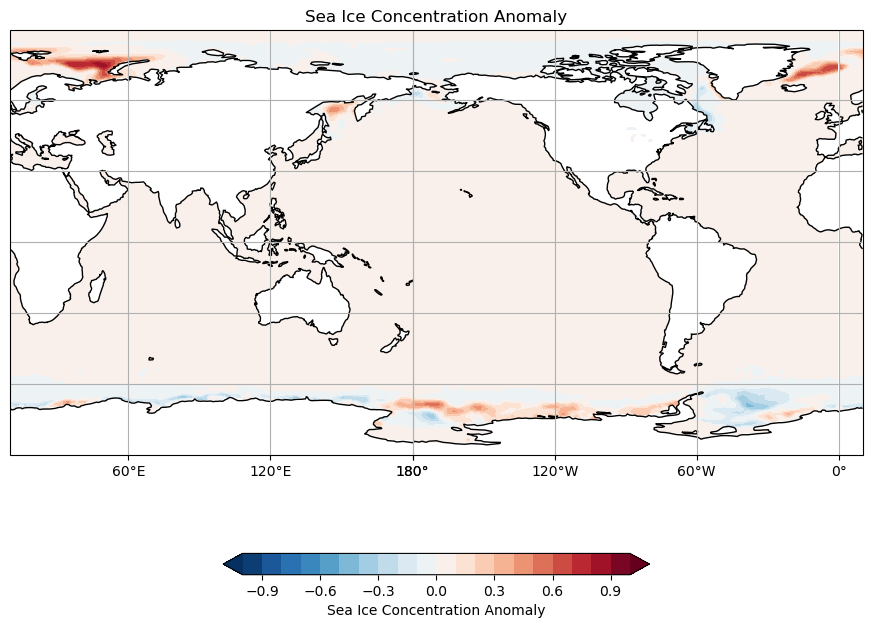

In [ ]:
## try to add hatching to the plot. ****



# Create a contour plot with hatching
ax.contourf(ds_icec['lon'], ds_icec['lat'], icec_anom[0, :, :], clevs,
            transform=ccrs.PlateCarree(), colors='none', hatches=['..', '..', '..'], extend='both')
clevs = np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-170))

#Add cyclic point

cyclic_data, cyclic_lons = add_cyclic_point(icec_anom.values,coord=ds_icec['lon'])

#Make a filled contour plot
cs = ax.contourf(ds_icec['lon'],ds_icec['lat'],icec_anom[0,:,:],clevs,
                 transform=ccrs.PlateCarree(),
                 cmap='RdBu_r',extend='both')

# ax.contourf(lon,icec_anom[0,:,:],clevs,
#                     transform=ccrs.PlateCarree(),
#                     colors='none', hatches=['..','..' ,'..'], extend='both')    

#Add coastlines
ax.coastlines()

#Add gridlines
ax.gridlines()

#Define the xticks for longtitude
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# ax.set_extent([-180,180,20,90],ccrs.PlateCarree())
# Call the colorbar
cbar = plt.colorbar(cs,orientation='horizontal', shrink=0.5, 
                    label='Sea Ice Concentration Anomaly')

#Add a title
ax.set_title('Sea Ice Concentration Anomaly')


In [16]:
elnino_icec = icec_anom.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_icec = icec_anom.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_icec = icec_anom.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_icec = [elnino_icec,lanina_icec,neutral_icec]
comp_icec

[<xarray.DataArray 'icec' (lat: 180, lon: 360)> Size: 259kB
 array([[0.012019  , 0.01173859, 0.01181191, ..., 0.01203194, 0.01199744,
         0.01169542],
        [0.00968941, 0.00955138, 0.00959881, ..., 0.00973686, 0.00975411,
         0.00958586],
        [0.00692419, 0.00651434, 0.00658336, ..., 0.00631587, 0.00622096,
         0.00648844],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
   * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5,
 <xarray.DataArray 'icec' (lat: 180, lon: 360)> Size: 259kB
 array([[0.01292715, 0.01314172, 0.01332794, ..., 0.01273686, 0.01304052,
         0.01319028],
   

Text(0.5, 0.98, 'Sea Ice Concentration Anomaly during ENSO events')

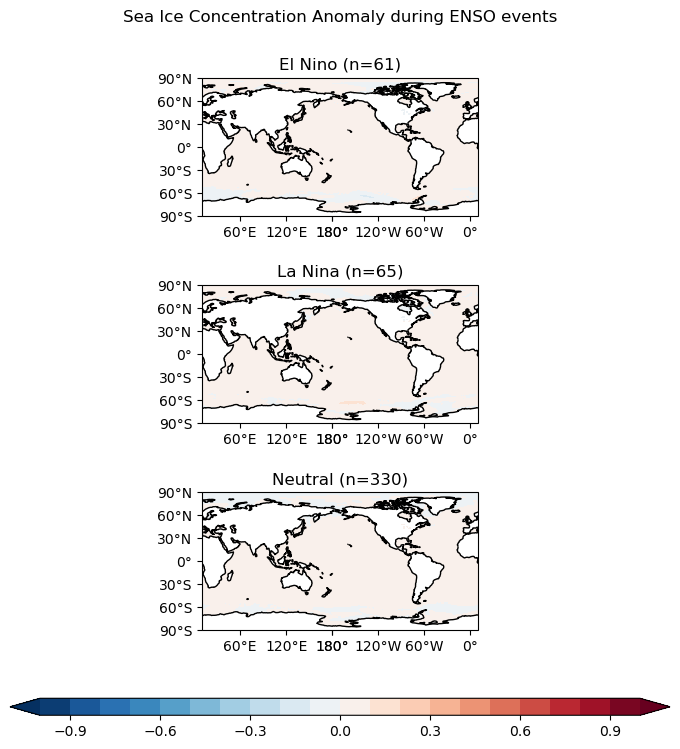

In [20]:

labels = ['El Nino','La Nina','Neutral']
clevs = np.arange(-1,1.1,0.1)

#Define the figure and each axis for the 3 rows and 3 column
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection':ccrs.PlateCarree(central_longitude=-170)},
                        figsize=(11,8.5))

# axs is a 2D array, flatten it so we can loop over it
# we will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#loop over all of the seasons and plot

for i,enso in enumerate(comp_icec):

        #Select the season
        data = comp_icec[i]

        #Add cyclic point
        data,lons = add_cyclic_point(data, coord=comp_icec[i]['lon'])

        #Add cyclic point
        cs = axs[i].contourf(lons,comp_icec[i]['lat'],data,clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='RdBu_r',extend='both')
        

        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # latitude labels
        axs[i].set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)


        # Title each subplot with the name of the season
        axs[i].set_title(labels[i] +' (n='+str(counts[i])+')')

        # Draw coastlines for each subplot
        axs[i].coastlines()

# Adjust the location of the subplots
# On the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')

#add a big title at the top
plt.suptitle('Sea Ice Concentration Anomaly during ENSO events')

## Trying plots and maps


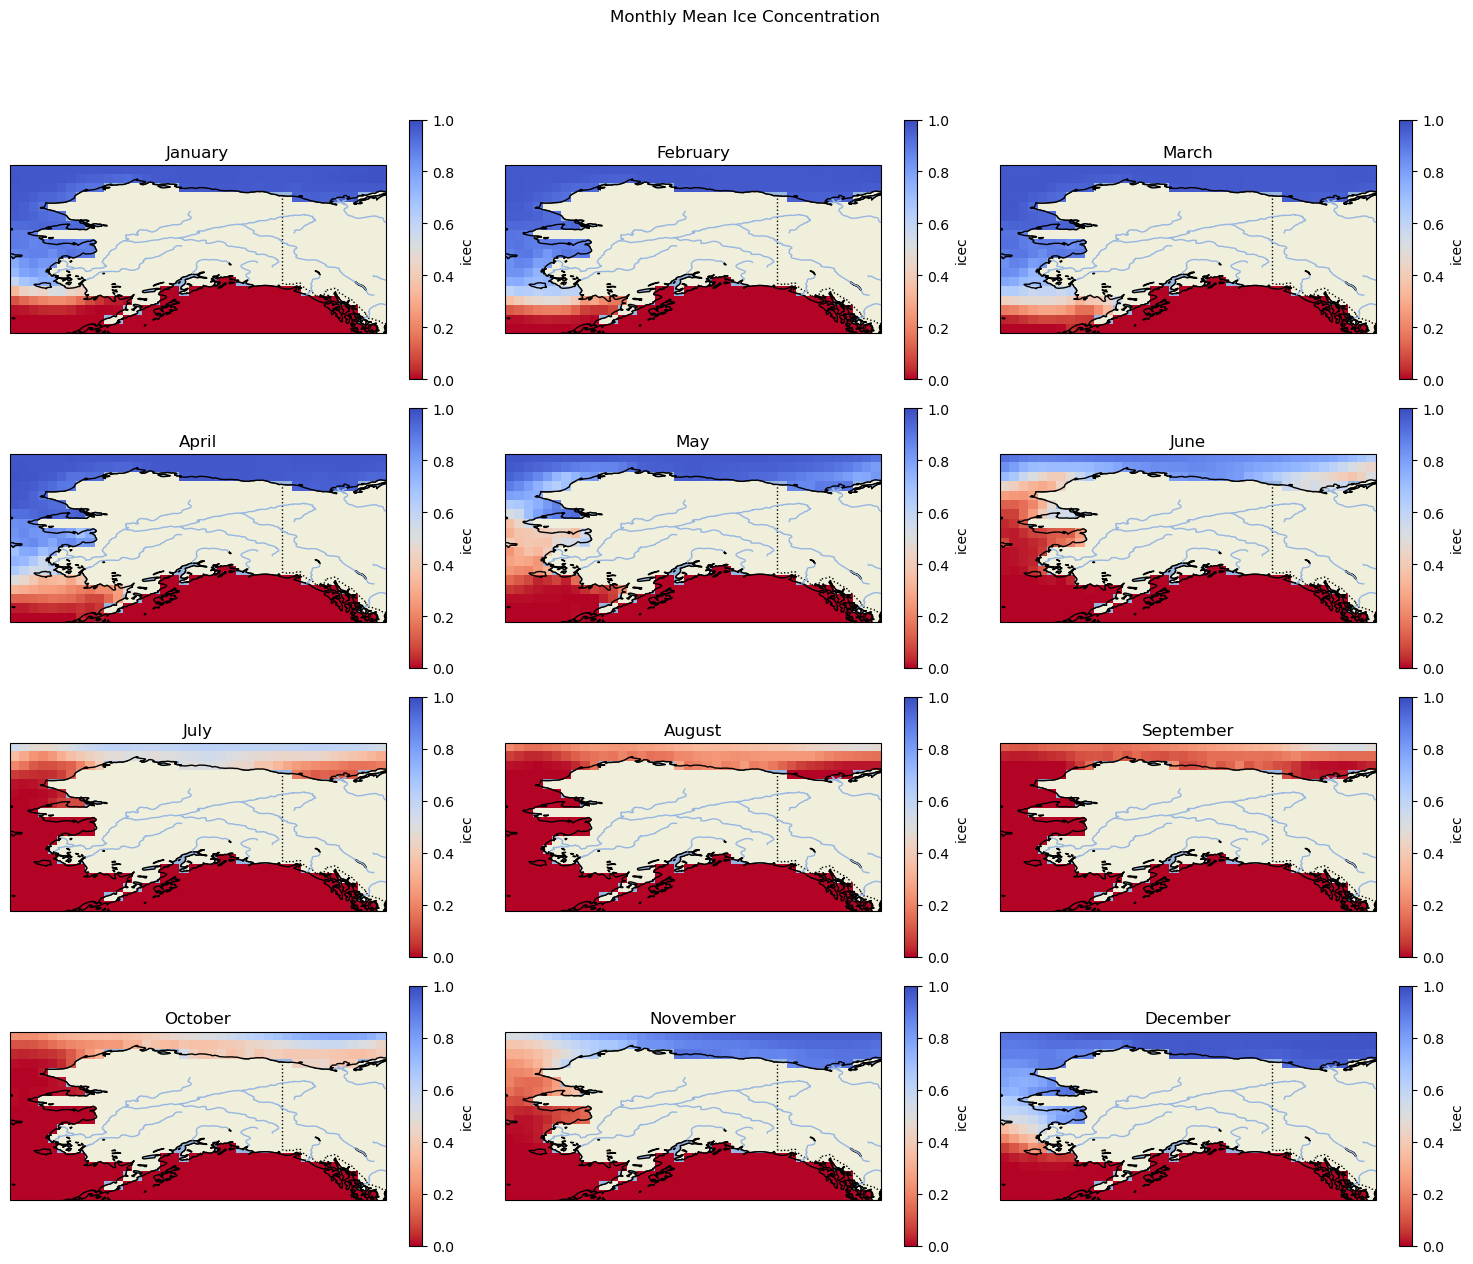

In [21]:
# Define the extent for Alaska

extent = [-170, -130, 55, 72]

# Plot the mean ice concentration for each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)
    ds_icec['icec'].sel(time=ds_icec['time.month']==i+1).mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', vmin=0, vmax=1)
    ax.set_title(calendar.month_name[i+1])

# Add colorbar at the bottom
# cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.02])
# cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap='coolwarm'), cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Ice Concentration')
fig.suptitle('Monthly Mean Ice Concentration', y=1.05)
plt.tight_layout()
plt.show()

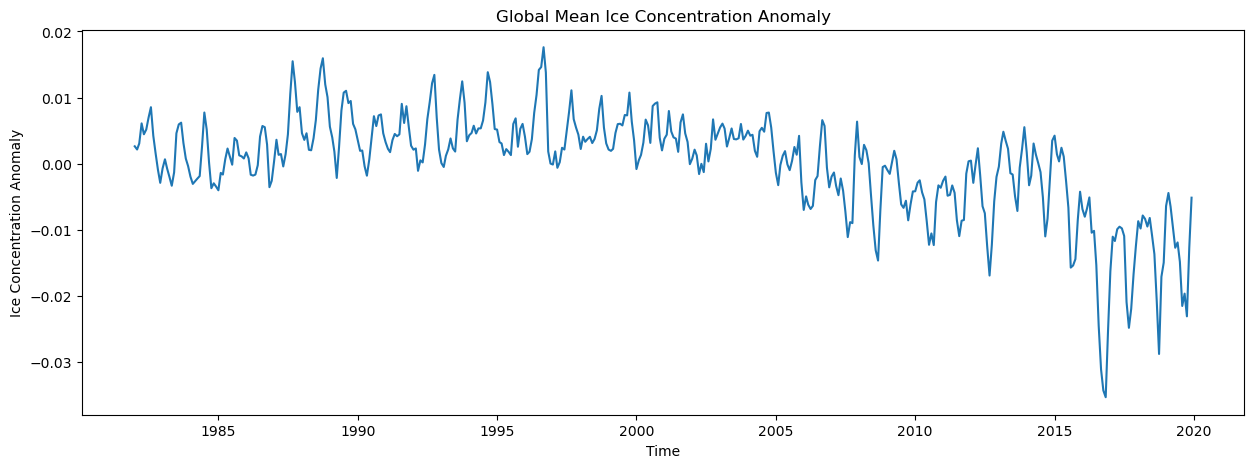

In [24]:
# Plot the ice concentration anomaly over time
fig, ax = plt.subplots(figsize=(15, 5))
icec_anom.mean(dim=['lat', 'lon']).plot(ax=ax)
ax.set_title('Global Mean Ice Concentration Anomaly')
ax.set_ylabel('Ice Concentration Anomaly')
ax.set_xlabel('Time')
plt.show()

In [ ]:

# Create animations for each month for ice concentration data

import matplotlib.animation as animation

# Define the extent for Alaska
extent = [-180, -130, 50, 72]

# Create animations for each month
for month in range(1, 13):
    # Select data for the specific month
    icec_month = ds_icec['icec'].sel(time=ds_icec['time.month'] == month)

    # Create a figure and axis for the animation
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent(extent)
    ax.add_feature(cart.BORDERS, linestyle=':')
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.LAND, edgecolor='black')
    ax.add_feature(cart.OCEAN)
    ax.add_feature(cart.LAKES, edgecolor='black')
    ax.add_feature(cart.RIVERS)

    # Initialize the plot with the first frame
    ice_plot = icec_month.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', add_colorbar=False)

    # Function to update the plot for each frame
    def update(frame):
        ax.clear()
        ax.set_extent(extent)
        ax.add_feature(cart.BORDERS, linestyle=':')
        ax.add_feature(cart.COASTLINE)
        ax.add_feature(cart.LAND, edgecolor='black')
        ax.add_feature(cart.OCEAN)
        ax.add_feature(cart.LAKES, edgecolor='black')
        ax.add_feature(cart.RIVERS)
        ice_plot = icec_month.isel(time=frame).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm_r', add_colorbar=False)
        time = pd.to_datetime(str(icec_month['time'].values[frame]))
        ax.set_title(f'Ice Concentration - {time.year} {calendar.month_name[month]}')

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=len(icec_month['time']), repeat=True)

    # Save the animation as a GIF
    ani.save(f'C:\\Users\\rbendopa\\OneDrive - George Mason University - O365 Production\\Class\\Clim680\\Assignment3\\ice_concentration_animation_{calendar.month_name[month]}.gif', writer='imagemagick')

    plt.close(fig)